# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

Подсчитаем производную: \\
\begin{align}
f'(x) = \arctan x + x\frac{1}{1 + x^2} - \frac{1}{1 + x^2} \cdot x = \arctan x
\end{align}
Подсчитаем вторую производную: \\
\begin{align}
f''(x) = \frac{1}{1 + x^2}
\end{align}
Чтобы метод сходился $x^* = 0$ должен лежать в $\frac{2L}{3M}$ окрестности $x^{0}$. \\
$L$ - это число, равное второй производной в точке оптимума, то есть 1. \\
$M$ - это старшое с.з. третьей производной, то есть $M = \max f'''(x) = \max(-\frac{2x}{(1 + x^2)^2}) = \frac{3\sqrt{3}}{8} < 0.65$. \\
Тогда метод сходится, при $|x^0| < 1.02$ \\


In [950]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ortho_group
import time

In [951]:
def Count_Grad(x):
  return np.arctan(x)

def Count_Hessian(x):
  return 1/(1 + x**2)

In [952]:
def Gradint_Descent_Default(x0, gamma, iters):
  x = x0
  for k in range(iters):
    grad = Count_Grad(x)
    if(grad == 0):
      return
    criterion_mas.append(abs(grad))
    x = x - gamma * grad

In [953]:
def Newton(x0, iters):
  x = x0
  for k in range(iters):
    grad = Count_Grad(x)
    if(grad == 0):
      return
    criterion_mas.append(abs(grad))
    x = x - 1/(Count_Hessian(x)) * grad

In [954]:
L = 1
M = 0.65

iters = 20

<ipython-input-951-42eb462d405c>:5: RuntimeWarning: overflow encountered in double_scalars
  return 1/(1 + x**2)
<ipython-input-953-65172c038b84>:8: RuntimeWarning: divide by zero encountered in double_scalars
  x = x - 1/(Count_Hessian(x)) * grad
<ipython-input-953-65172c038b84>:8: RuntimeWarning: invalid value encountered in double_scalars
  x = x - 1/(Count_Hessian(x)) * grad


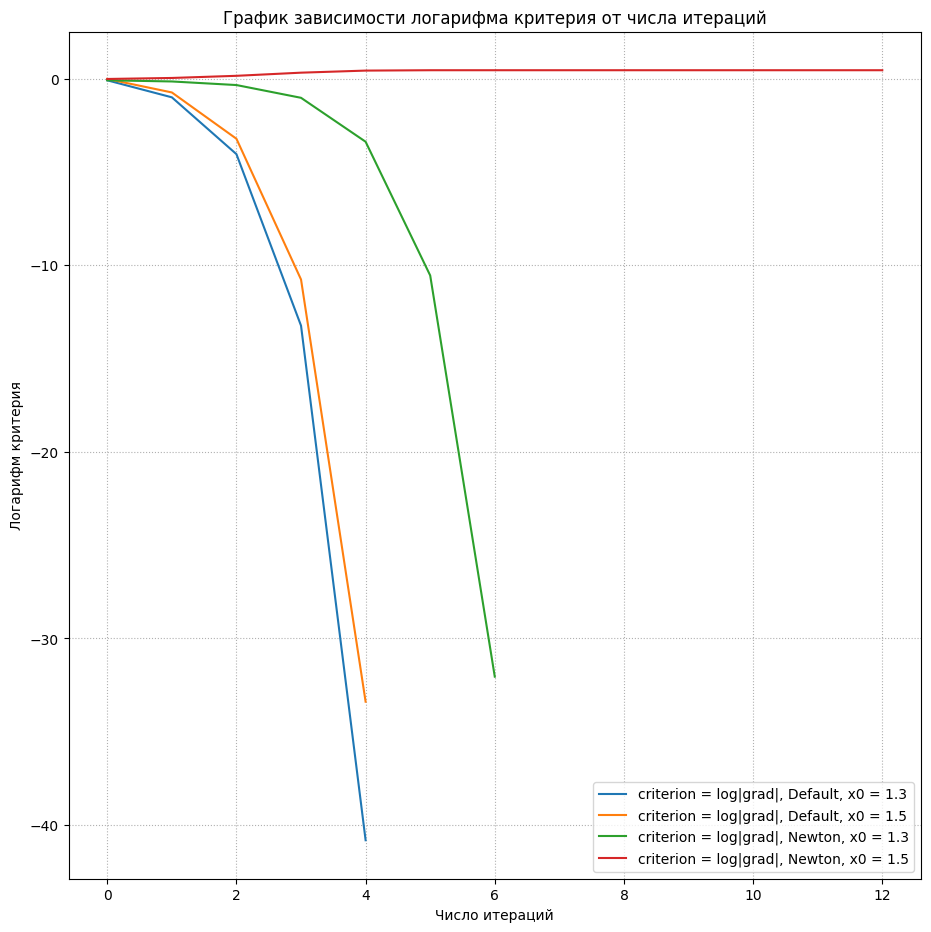

In [955]:
plt.figure(figsize=(11, 11))

iters_mas = [i for i in range(iters)]

criterion_mas = []
Gradint_Descent_Default(1.3, 1/L, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Default, x0 = 1.3')

criterion_mas = []
Gradint_Descent_Default(1.5, 1/L, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Default, x0 = 1.5')

criterion_mas = []
Newton(1.3, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Newton, x0 = 1.3')

criterion_mas = []
Newton(1.5, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Newton, x0 = 1.5')


plt.ylabel('Логарифм критерия'), plt.xlabel('Число итераций')
plt.title('График зависимости логарифма критерия от числа итераций')
plt.legend()
plt.grid(ls=':')
plt.show()

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

In [956]:
def func(x):
  return x * np.arctan(x) - 1/2 * np.log(1 + x**2)

In [957]:
def Newton_Damping(x0, gamma, iters):
  x = x0
  for k in range(iters):
    grad = Count_Grad(x)
    if(grad == 0):
      return
    criterion_mas.append(abs(grad))
    x = x - gamma(k) * 1/(Count_Hessian(x)) * grad

In [958]:
def Newton_Armiho(x0, alpha, c, iters):
  x = x0
  for k in range(iters):
    grad = Count_Grad(x)
    if(grad == 0):
      return
    criterion_mas.append(abs(grad))
    while(func(x - alpha *  grad * 1/(Count_Hessian(x))) > func(x) - c * alpha * grad * 1/(Count_Hessian(x)) * grad):
      alpha = alpha/2
    x = x - alpha * 1/(Count_Hessian(x)) * grad

Запишем итерацию кубического метода: \\
\begin{align}
x^{k  + 1} = \text{argmin}_{x \in \mathbb{R}}(f(x^k) + <\nabla f(x^k), x - x^k> + \frac{1}{2} <x - x^k, \nabla^2 f(x^k)(x - x^k)> + \frac{M}{6}||x^k - x||^3)
\end{align}
Тогда беря производную и учитывая, что в нашей задаче $x^{k + 1} < x^k$:
\begin{align}
x^{k + 1} = x^k - \frac{\sqrt{(\nabla^2f(x^k))^2 + 2M\nabla f(x^k}) - \nabla^2f(x^k)}{M}
\end{align}

In [959]:
def Newton_Cube(x0, iters):
  x = x0
  for k in range(iters):
    grad = Count_Grad(x)
    if(grad == 0):
      return
    criterion_mas.append(abs(grad))
    hessian = Count_Hessian(x)
    x = x - 1/M * (np.sqrt(hessian**2 + 2 * M * grad) - hessian)

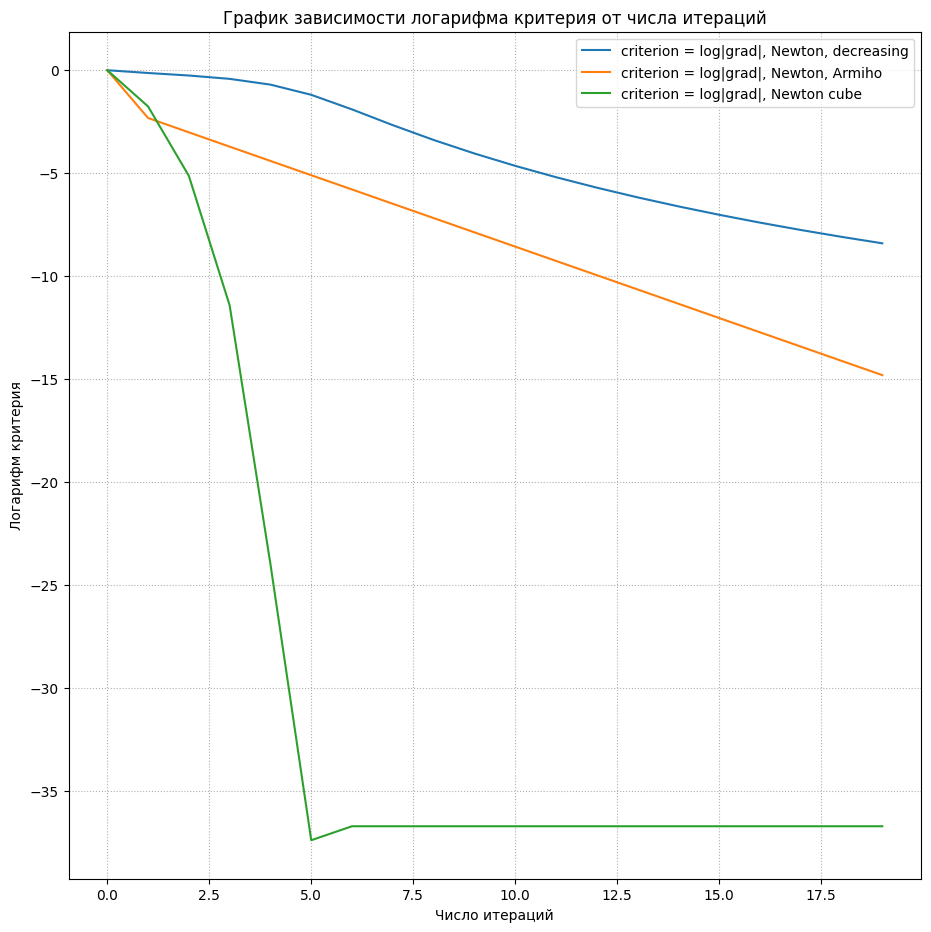

In [960]:
plt.figure(figsize=(11, 11))

iters_mas = [i for i in range(iters)]

gamma = lambda k: 1 * (np.log(k + 2))**0.5
criterion_mas = []
Newton_Damping(1.5, gamma, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Newton, decreasing')

criterion_mas = []
Newton_Armiho(1.5, 1, 0.3, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Newton, Armiho')

criterion_mas = []
Newton_Cube(1.5, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log|grad|, Newton cube')


plt.ylabel('Логарифм критерия'), plt.xlabel('Число итераций')
plt.title('График зависимости логарифма критерия от числа итераций')
plt.legend()
plt.grid(ls=':')
plt.show()

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

Пока значение критерия больше определённого числа, будем использовать обычный(хотя зачем, тут Ньютон экспериментально всегда почему то сходится). Потом - Ньютон.

In [961]:
dataset = "mushrooms.txt" 

In [962]:
#from google.colab import files
#files.upload()
1

1

In [963]:
from sklearn.datasets import load_svmlight_file

data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape

In [964]:
L = 1/n * 2 * max(np.linalg.eigvalsh((X.T@X + L/50 * np.eye(d))))
print(f"L = {L} \n")

L = 20.689718794918367 



In [965]:
def Count_Grad(X, y, w, n):
  return (2*(X.T@X)@w - 2*X.T@y)/n + L/50 * w

def Count_Hessian(X, y, w, n):
  return (2*(X.T@X))/n + L/50 * np.eye(d)

def Count_Func(X, y, w, n):
  return 1/n*(np.linalg.norm(X@w - y))**2 + L/100 * (np.linalg.norm(w))**2

In [966]:
def Newton_And_Default(x0, iters):
  x = x0
  grad = Count_Grad(X, y, x, n)
  crit = np.linalg.norm(grad)
  while(crit > 1):
    grad = Count_Grad(X, y, x, n)
    crit = np.linalg.norm(grad)
    criterion_mas.append(crit)
    x = x - 1/L * grad

  for k in range(iters):
    grad = Count_Grad(X, y, x, n)
    criterion_mas.append(np.linalg.norm(grad))
    x = x - np.linalg.inv(Count_Hessian(X, y, x, n)) @ grad

In [967]:
iters = 50

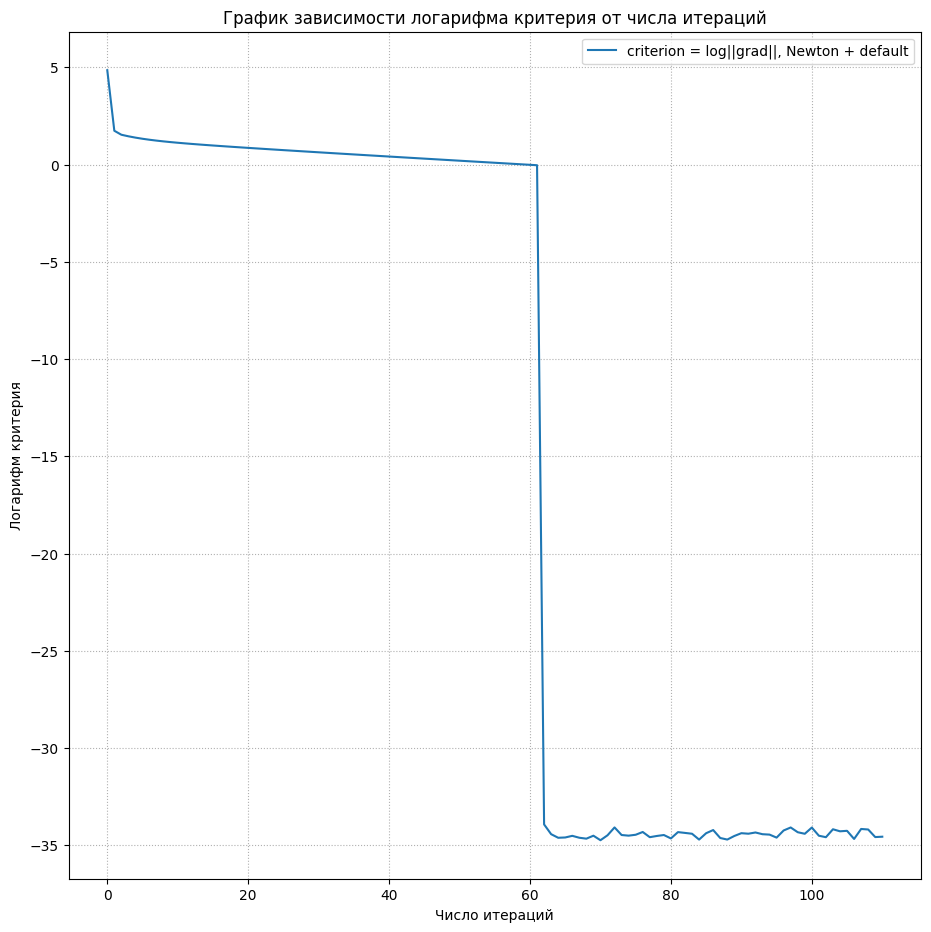

In [968]:
plt.figure(figsize=(11, 11))

iters_mas = [i for i in range(5 * iters)]

criterion_mas = []
Newton_And_Default(np.ones(d), iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log||grad||, Newton + default')


plt.ylabel('Логарифм критерия'), plt.xlabel('Число итераций')
plt.title('График зависимости логарифма критерия от числа итераций')
plt.legend()
plt.grid(ls=':')
plt.show()

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [969]:
acc_mas = []

def Broyden(x0, iters):
  x = x0
  H = Count_Hessian(X, y, x, n)
  grad = Count_Grad(X, y, x, n)
  for i in range(iters):
    criterion_mas.append(np.linalg.norm(grad))
    y_pred = (np.around(X@x))
    diff = y_pred - y
    acc = list(diff).count(0)/len(y)
    acc_mas.append(acc)

    x_old = x
    x = x - H @ grad
    s = x - x_old

    grad_old = grad
    grad = Count_Grad(X, y, x, n)
    y_ = grad - grad_old

    q = s - H@y_
    mu = 1/(q.T @ y_)
    H = H + mu * np.outer(q, q.T)

In [970]:
acc_mas = []

def DFP(x0, iters):
  x = x0
  H = Count_Hessian(X, y, x, n)
  grad = Count_Grad(X, y, x, n)
  for i in range(iters):
    criterion_mas.append(np.linalg.norm(grad))
    y_pred = (np.around(X@x))
    diff = y_pred - y
    acc = list(diff).count(0)/len(y)
    acc_mas.append(acc)

    x_old = x
    x = x - H @ grad
    s = x - x_old

    grad_old = grad
    grad = Count_Grad(X, y, x, n)
    y_ = grad - grad_old

    mu1 = 1/(s.T@y_)
    mu2 = -1/((H@y_).T@y_)
    H = H + mu1*np.outer(s, s.T) + mu2 * np.outer(H@y_, (H@y_).T)

In [971]:
acc_mas = []

def BFGS(x0, alpha, c1, c2, iters):
  x = x0
  H = Count_Hessian(X, y, x, n)
  grad = Count_Grad(X, y, x, n)
  for i in range(iters):
    criterion_mas.append(np.linalg.norm(grad))
    y_pred = (np.around(X@x))
    diff = y_pred - y
    acc = list(diff).count(0)/len(y)
    acc_mas.append(acc)

    p = -H@grad
    while(not ((Count_Func(X, y, x + alpha * p, n) <= Count_Func(X, y, x, n) + c1*alpha*grad.T@p) or (Count_Grad(X, y, x + alpha*p, n).T@p >= c2*grad.T@p))):
      alpha = alpha/2
    
    x_old = x
    x = x + alpha * p
    s = x - x_old

    grad_old = grad
    grad = Count_Grad(X, y, x, n)
    y_ = grad - grad_old

    rho = 1/(y_.T@s)
    I = np.eye(H.shape[0])
    H = (I - rho * np.outer(s, y_.T))@H@(I - rho * np.outer(y_, s.T)) + rho * np.outer(s, s.T)

In [972]:
acc_mas = []

def L_BFGS(x0, alpha, c1, c2, m, iters):
  x = x0
  H0 = Count_Hessian(X, y, x, n)
  H = H0
  grad = Count_Grad(X, y, x, n)
  rho_mas = []
  s_mas = []
  y_mas = []
  for i in range(iters):
    criterion_mas.append(np.linalg.norm(grad))
    y_pred = (np.around(X@x))
    diff = y_pred - y
    acc = list(diff).count(0)/len(y)
    acc_mas.append(acc)

    p = -H@grad
    while(not ((Count_Func(X, y, x + alpha * p, n) <= Count_Func(X, y, x, n) + c1*alpha*grad.T@p) or (Count_Grad(X, y, x + alpha*p, n).T@p >= c2*grad.T@p))):
      alpha = alpha/2
    
    x_old = x
    x = x + alpha * p
    s = x - x_old
    s_mas.append(s)
    if(len(s_mas) > m):
      s_mas.pop(0)

    grad_old = grad
    grad = Count_Grad(X, y, x, n)
    y_ = grad - grad_old
    y_mas.append(y_)
    if(len(y_mas) > m):
      y_mas.pop(0)

    rho = 1/(y_.T@s)
    rho_mas.append(rho)
    if(len(rho_mas) > m):
      rho_mas.pop(0)

    H_temp = H0
    I = np.eye(H.shape[0])
    m_ = min(i + 1, m)
    mult  = np.eye(H.shape[0])
    for j in range(m_):
      V = (I - rho_mas[j] * np.outer(y_mas[j], s_mas[j].T))
      mult = mult @ V
    H_temp = mult.T@H_temp@mult


    for j in range(1, m_):
      cur = rho_mas[j - 1] * np.outer(s_mas[j - 1], s_mas[j - 1].T)
      mult  = np.eye(H.shape[0])
      for z in range(j, m_):
        V = (I - rho_mas[z] * np.outer(y_mas[z], s_mas[z].T))
        mult = mult @ V
      cur = mult.T@cur@mult
      H_temp = H_temp + cur
    
    H = H_temp + rho_mas[m_ - 1]*np.outer(s_mas[m_ - 1], s_mas[m_ - 1].T)

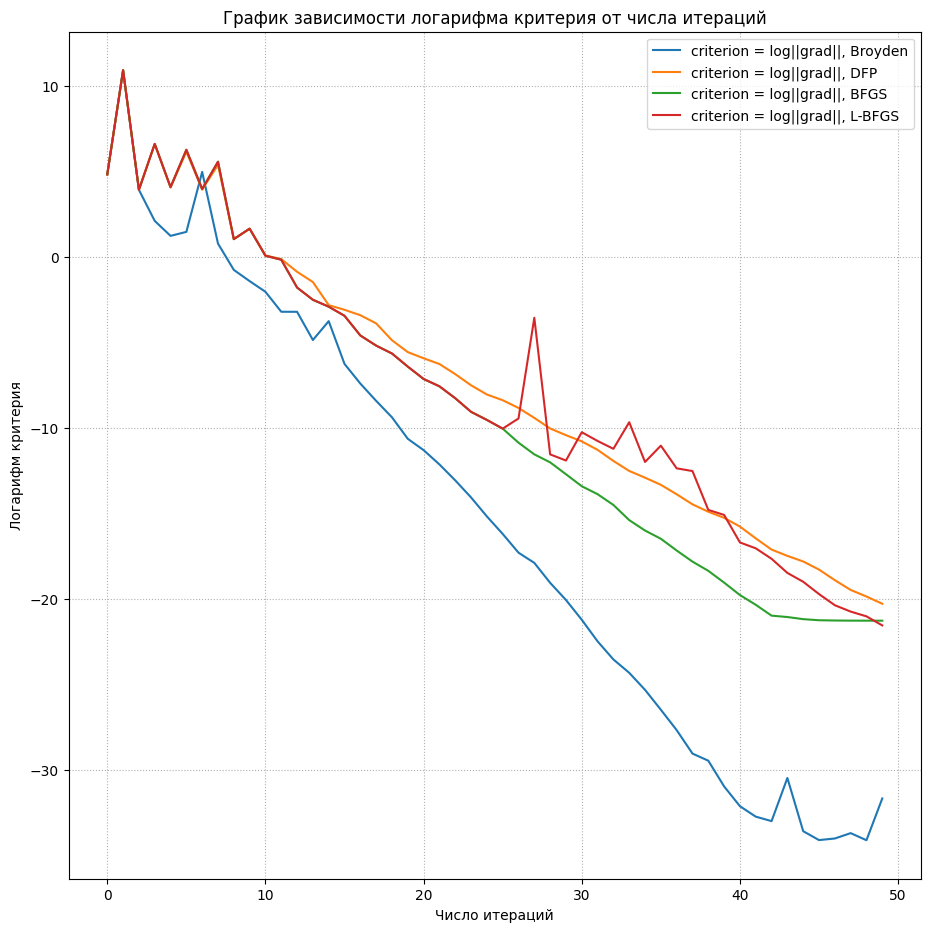

In [973]:
plt.figure(figsize=(11, 11))

iters_mas = [i for i in range(2 * iters)]

criterion_mas = []
Broyden(np.ones(d), iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log||grad||, Broyden')

criterion_mas = []
DFP(np.ones(d), iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log||grad||, DFP')

criterion_mas = []
BFGS(np.ones(d), 1, 0.15, 0.25, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log||grad||, BFGS')

criterion_mas = []
L_BFGS(np.ones(d), 1, 0.15, 0.25, 22, iters)
plt.plot(iters_mas[:len(criterion_mas)], np.log(criterion_mas),  label = 'criterion = log||grad||, L-BFGS')


plt.ylabel('Логарифм критерия'), plt.xlabel('Число итераций')
plt.title('График зависимости логарифма критерия от числа итераций')
plt.legend()
plt.grid(ls=':')
plt.show()

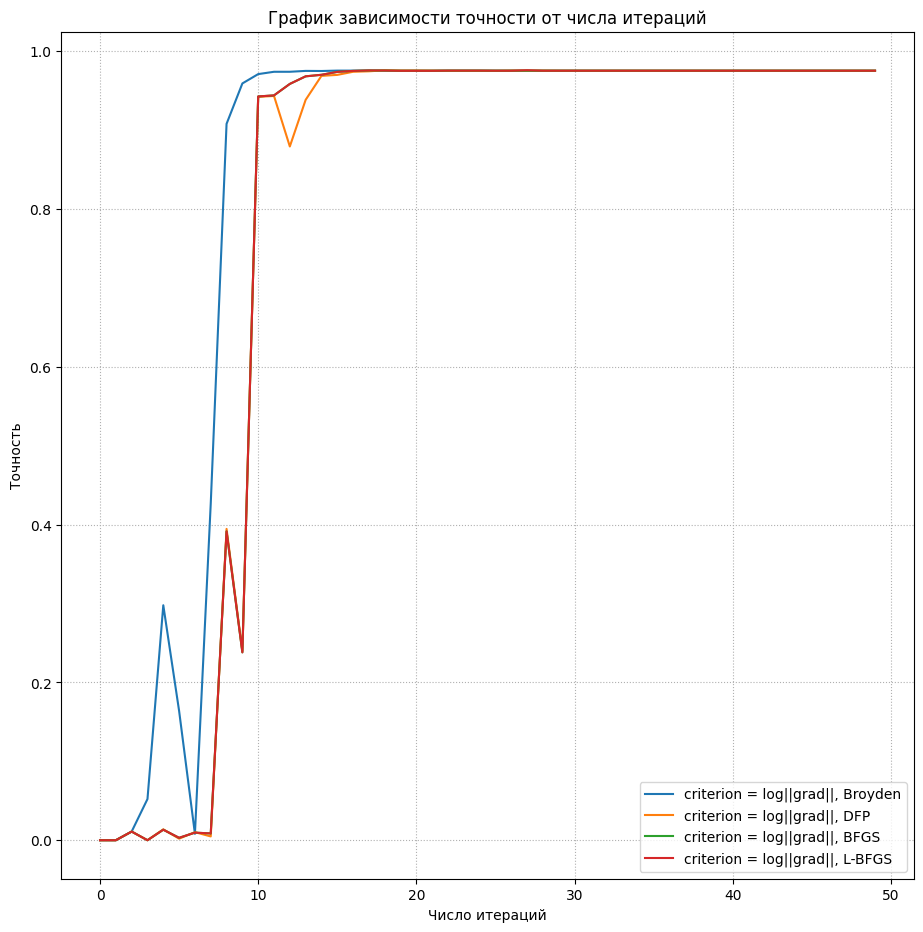

In [974]:
plt.figure(figsize=(11, 11))

iters_mas = [i for i in range(2 * iters)]

acc_mas = []
Broyden(np.ones(d), iters)
plt.plot(iters_mas[:len(acc_mas)], acc_mas,  label = 'criterion = log||grad||, Broyden')

acc_mas = []
DFP(np.ones(d), iters)
plt.plot(iters_mas[:len(acc_mas)], acc_mas,  label = 'criterion = log||grad||, DFP')

acc_mas = []
BFGS(np.ones(d), 1, 0.15, 0.25, iters)
plt.plot(iters_mas[:len(acc_mas)], acc_mas,  label = 'criterion = log||grad||, BFGS')

acc_mas = []
L_BFGS(np.ones(d), 1, 0.15, 0.25, 22, iters)
plt.plot(iters_mas[:len(acc_mas)], acc_mas,  label = 'criterion = log||grad||, L-BFGS')


plt.ylabel('Точность'), plt.xlabel('Число итераций')
plt.title('График зависимости точности от числа итераций')
plt.legend()
plt.grid(ls=':')
plt.show()

Сделаем вывод. Как всегда, лучше всего работает самый тривиальный алгоритм(спасибо Бройдену). Остальные работают чуть хуже, но всё равно показывают хороший резуьтат и выдают такую же хорошую точность.

__Бонусные пункты__

__(в)__ Реализуйте подход из [работы](https://pages.cs.wisc.edu/~swright/726/handouts/barzilai-borwein.pdf). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Сделайте вывод.

In [975]:
#ответ

__(г)__ Реализуйте методы Newton-Learn и Cubic-Newton-Learn из [работы](https://proceedings.mlr.press/v139/islamov21a.html). С помощью них решите задачу регресии. Сравните их работу с квазиньютоновскими методами. Какой критерий сравнения будете использовать? 

In [976]:
#ответ